In [1]:
import pandas as pd
import category_encoders as ce
from autots import AutoTS

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,ID,date,cluster_id,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,cluster_1_2014-01-01,2014-01-01,cluster_1,358.032,10.8,4.2,5.5,0.4,53.003333,29787.533333,40.6,79.2,186.000000,1.176667,0.483333
1,cluster_2_2014-01-01,2014-01-01,cluster_2,548.247,12.2,4.3,8.6,-0.4,8195.656667,30650.350000,36.0,81.7,170.591118,3.383333,0.736667
2,cluster_3_2014-01-01,2014-01-01,cluster_3,758.303,12.9,-0.8,10.1,-4.9,16305.260000,31547.686667,20.9,44.3,159.467752,3.880000,0.716667
3,cluster_4_2014-01-01,2014-01-01,cluster_4,1072.077,10.8,4.7,6.7,0.6,9224.803333,30769.220000,34.7,82.8,184.339753,3.153333,0.676667
4,cluster_1_2014-01-02,2014-01-02,cluster_1,386.908,10.7,7.0,6.6,3.3,22372.000000,29850.226667,34.3,75.2,210.333465,3.640000,0.780000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11688 non-null  object 
 1   date                         11688 non-null  object 
 2   cluster_id                   11688 non-null  object 
 3   electricity_consumption      11688 non-null  float64
 4   temperature_2m_max           11688 non-null  float64
 5   temperature_2m_min           11688 non-null  float64
 6   apparent_temperature_max     11688 non-null  float64
 7   apparent_temperature_min     11688 non-null  float64
 8   sunshine_duration            11688 non-null  float64
 9   daylight_duration            11688 non-null  float64
 10  wind_speed_10m_max           11688 non-null  float64
 11  wind_gusts_10m_max           11688 non-null  float64
 12  wind_direction_10m_dominant  11688 non-null  float64
 13  shortwave_radiat

In [10]:
data['date'] = pd.to_datetime(data['date'])

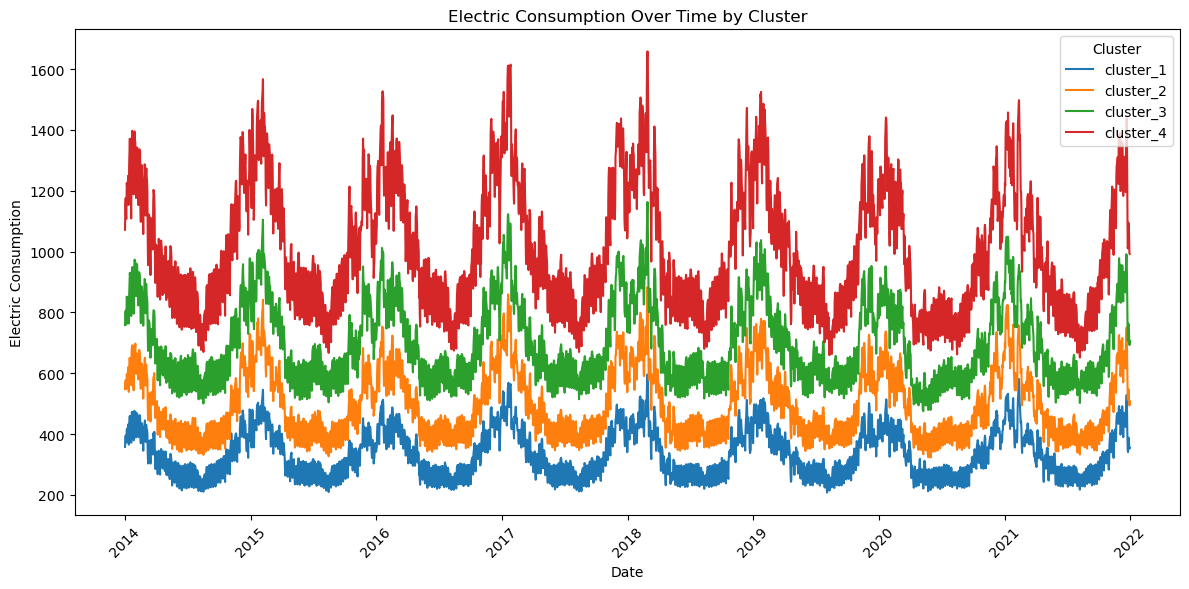

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date', y='electricity_consumption', hue='cluster_id')
plt.title("Electric Consumption Over Time by Cluster")
plt.xlabel("Date")
plt.ylabel("Electric Consumption")
plt.legend(title="Cluster")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
df = pd.read_csv("train.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11688 non-null  object 
 1   date                         11688 non-null  object 
 2   cluster_id                   11688 non-null  object 
 3   electricity_consumption      11688 non-null  float64
 4   temperature_2m_max           11688 non-null  float64
 5   temperature_2m_min           11688 non-null  float64
 6   apparent_temperature_max     11688 non-null  float64
 7   apparent_temperature_min     11688 non-null  float64
 8   sunshine_duration            11688 non-null  float64
 9   daylight_duration            11688 non-null  float64
 10  wind_speed_10m_max           11688 non-null  float64
 11  wind_gusts_10m_max           11688 non-null  float64
 12  wind_direction_10m_dominant  11688 non-null  float64
 13  shortwave_radiat

In [8]:
# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# The 'ID' column is redundant since we have 'cluster_id' and 'date', so we can drop it
df = df.drop(columns=['ID'])

print("Data loaded and prepared:")
print(df.info())

Data loaded and prepared:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         11688 non-null  datetime64[ns]
 1   cluster_id                   11688 non-null  object        
 2   electricity_consumption      11688 non-null  float64       
 3   temperature_2m_max           11688 non-null  float64       
 4   temperature_2m_min           11688 non-null  float64       
 5   apparent_temperature_max     11688 non-null  float64       
 6   apparent_temperature_min     11688 non-null  float64       
 7   sunshine_duration            11688 non-null  float64       
 8   daylight_duration            11688 non-null  float64       
 9   wind_speed_10m_max           11688 non-null  float64       
 10  wind_gusts_10m_max           11688 non-null  float64       
 11  wind_direction_

In [9]:
# This is what we want to predict
target_column = 'electricity_consumption'

# This uniquely identifies each time series
item_id_column = 'cluster_id'

# This is the time index
timestamp_column = 'date'

# These are features that we assume are known in the future (from a weather forecast)
known_covariates_names = [
    'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_max',
    'apparent_temperature_min', 'sunshine_duration', 'daylight_duration',
    'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant',
    'shortwave_radiation_sum', 'et0_fao_evapotranspiration'
]

In [13]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

# Convert the pandas DataFrame to AutoGluon's TimeSeriesDataFrame
data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column=item_id_column,
    timestamp_column=timestamp_column
)

print("\nData converted to TimeSeriesDataFrame:")
print(data.head())


Data converted to TimeSeriesDataFrame:
                      electricity_consumption  temperature_2m_max  \
item_id   timestamp                                                 
cluster_1 2014-01-01                  358.032                10.8   
cluster_2 2014-01-01                  548.247                12.2   
cluster_3 2014-01-01                  758.303                12.9   
cluster_4 2014-01-01                 1072.077                10.8   
cluster_1 2014-01-02                  386.908                10.7   

                      temperature_2m_min  apparent_temperature_max  \
item_id   timestamp                                                  
cluster_1 2014-01-01                 4.2                       5.5   
cluster_2 2014-01-01                 4.3                       8.6   
cluster_3 2014-01-01                -0.8                      10.1   
cluster_4 2014-01-01                 4.7                       6.7   
cluster_1 2014-01-02                 7.0                

In [ ]:
# Let's say we want to forecast the next 7 days
prediction_length = 849

# Initialize the TimeSeriesPredictor
predictor = TimeSeriesPredictor(
    prediction_length=prediction_length,
    path="autogluon_electricity_forecast",  # Folder to save models
    target=target_column,
    eval_metric="RMSE",  # A good default metric for time series
    known_covariates_names=known_covariates_names # IMPORTANT: Tell AutoGluon about your weather features
)

# Train the models
# AutoGluon will automatically split the data for validation
# Using a preset like 'medium_quality' is a good balance of speed and accuracy
predictor.fit(
    data,
    presets="medium_quality",
    time_limit=1200 # Optional: train for 6 minutes
)

Beginning AutoGluon training... Time limit = 1200s
AutoGluon will save models to 'd:\Projects\compfest\compfest-ds-academy\autogluon_electricity_forecast'
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          12
GPU Count:          0
Memory Avail:       0.52 GB / 7.31 GB (7.1%)
Disk Space Avail:   111.12 GB / 135.74 GB (81.9%)
Setting presets to: medium_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': RMSE,
 'hyperparameters': 'light',
 'known_covariates_names': ['temperature_2m_max',
                            'temperature_2m_min',
                            'apparent_temperature_max',
                            'apparent_temperature_min',
                            'sunshine_duration',
                            'daylight_duration',
                            'wind_speed_10m_max',
                  

model.safetensors:  42%|####1     | 136M/327M [00:00<?, ?B/s]

	-82.2655      = Validation score (-RMSE)
	0.06    s     = Training runtime
	28.99   s     = Validation (prediction) runtime
Training timeseries model TemporalFusionTransformer. Training for up to 576.9s of the 1153.7s of remaining time.


In [16]:
future_covariates_df = pd.read_csv('test.csv') # Your new file
future_covariates_df = future_covariates_df.drop(columns=['ID'])

# --- CRITICAL ---
# Apply the exact same preparation steps as you did for the training data.
future_covariates_df['date'] = pd.to_datetime(future_covariates_df['date'])


# It's good practice to ensure the columns are in a consistent order, though not strictly required.
print("Future covariates data loaded and prepared:")
print(future_covariates_df.head())
print(future_covariates_df.info())

Future covariates data loaded and prepared:
        date cluster_id  temperature_2m_max  temperature_2m_min  \
0 2022-01-01  cluster_1                15.2                 7.9   
1 2022-01-01  cluster_2                15.9                 4.1   
2 2022-01-01  cluster_3                18.6                 4.9   
3 2022-01-01  cluster_4                13.3                 3.9   
4 2022-01-02  cluster_1                14.1                 8.1   

   apparent_temperature_max  apparent_temperature_min  sunshine_duration  \
0                      14.2                       5.2       21902.986667   
1                      15.3                       1.3       23550.080000   
2                      18.8                       1.8       24179.643333   
3                      11.9                       1.3       23839.203333   
4                      11.2                       5.3       21018.193333   

   daylight_duration  wind_speed_10m_max  wind_gusts_10m_max  \
0       29784.506667            

In [ ]:
# Convert the pandas DataFrame to AutoGluon's TimeSeriesDataFrame
future_covariates_df = TimeSeriesDataFrame.from_data_frame(
    future_covariates_df,
    id_column=item_id_column,
    timestamp_column=timestamp_column
)
# Use the historical data for context and the new dataframe for future known values
predictions = predictor.predict(data, known_covariates=future_covariates_df)

print("\nSuccessfully generated forecasts using the provided future data:")
print(predictions)

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble



Successfully generated forecasts using the provided future data:
                             mean          0.1          0.2          0.3  \
item_id   timestamp                                                        
cluster_1 2022-01-01   335.688650   258.488703   284.989856   304.099051   
          2022-01-02   331.253665   222.630559   259.918637   286.805964   
          2022-01-03   346.594779   213.394819   259.119626   292.090429   
          2022-01-04   349.551373   195.619189   248.460943   286.563565   
          2022-01-05   353.106183   180.928112   240.033308   282.652312   
...                           ...          ...          ...          ...   
cluster_4 2024-04-24  1023.985823 -5026.205587 -2949.299135 -1451.703461   
          2024-04-25  1023.232326 -5030.694034 -2952.505451 -1453.985270   
          2024-04-26  1017.078333 -5040.627354 -2961.141407 -1461.685736   
          2024-04-27   992.775288 -5068.592641 -2987.849518 -1487.487335   
          2024-04-28  

In [21]:
predictor.leaderboard()

,model,score_val,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-126.387359,10.694209,1.513628,8
1,DirectTabular,-131.038297,0.200342,0.663178,4
2,TemporalFusionTransformer,-134.588246,0.417674,134.155740,7
3,Naive,-151.971335,9.308903,0.037677,1
4,SeasonalNaive,-162.262043,4.229173,0.044977,2
5,Theta,-164.282316,3.473231,0.033242,6
6,ETS,-165.993420,6.264693,0.036054,5
7,RecursiveTabular,-184.103020,8.409103,0.677002,3
